<a href="https://colab.research.google.com/github/Umerfarooq122/Python-Projects/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Diabatese, Hypertension and Stroke using Different Machine Learning Models**


## **Introduction:**

This study focuses on finding out the root causes of the three very infamous diseases or medical condition in United states.  We will be using three data set, initially, we will explore through that data and will carry out an exploratory data analysis for each data set and then followed by picking out the most reasonable causes of each disease from that data set using techniques like correlation plots. After figuring out the dependencies of our targetted variables in each data set we will go ahead and use different machine learning models to figure out which modeling techniques will be more suitable for each particular data set. But before using any machine learning models we have to preprocess out data sets for any missing values e.t.c. So before any further due let's load our data sets and get to work. I found the data sets on Kaggle.com the link below:
https://www.kaggle.com/datasets/prosperchuks/health-dataset

The datasets has been uploaded to github repository from where we will reading it into our notebook.

## **Loading the libraries and data sets:**

### **Libraries**

In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import pickle
import pandas_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

### **Data sets:**

In [ ]:
df_hyp = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/Data_sets/main/hypertension_data.csv")

In [ ]:
df_dia = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/Data_sets/main/diabetes_data.csv")

In [ ]:
df_str = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/Data_sets/main/stroke_data.csv")

## **1. Diabetes:**

Now we have loaded all the data sets into our notebook. We will start with diabetes data set and let's display the first 5 rows of the data set to check if everything has loaded properly.

In [ ]:
df_dia.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


Everything looks great so lets go ahead and further explore the data set. We will start with looking for any missing values and if there less than 3% of missing values in our data set we will just remove them from our analysis

In [ ]:
df_dia.shape

(70692, 18)

### **Handling missing and duplicate values:**

In [ ]:
cols_with_missing_dia = [col for col in df_dia.columns
                     if df_dia[col].isnull().any()]

In [ ]:
for i in cols_with_missing_dia:
    print(i,df_dia[i].isnull().sum())

As we can see that there no missing values in our data set which is a very good start so lets get a graphical view of all the different variables we have available that can potientially affect our outcome variable which daibetes in this case:

Lets check out the duplicate values:

In [ ]:
df_dia.duplicated().sum()

6672

As we can see that there are in total 6672 duplicate values in our data frame so lets remove those from our analysis since the total number of duplicates is less than 1% of overall observation so we can remove those from our observations.

In [ ]:
df_dia = df_dia.drop_duplicates()
df_dia.duplicated().sum()

0

So now we can see that we have got rid duplicates and missing values so now we can go ahead and explore, analyze and model the data.

## **Exploratory data analysis:**

Lets explore our target column first, and check out how many respondents had diabetes. We will use count plot from seaborn.

#### **Target column:**

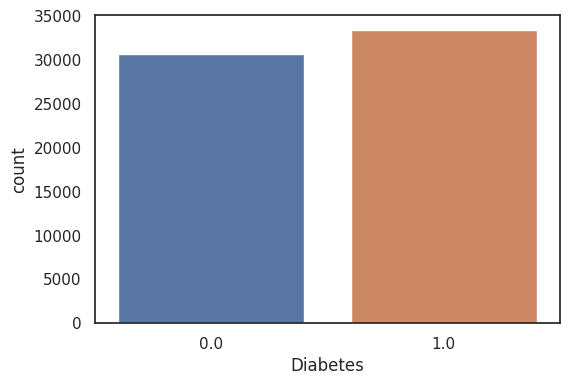

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['Diabetes'])

plt.show()


As we can see that we have slighty higher number of diabetic than non-diabetic respondents.

#### **Age:**

Let's check out the age distribution to get an idea of the what age group of respondents are we looking at right now.

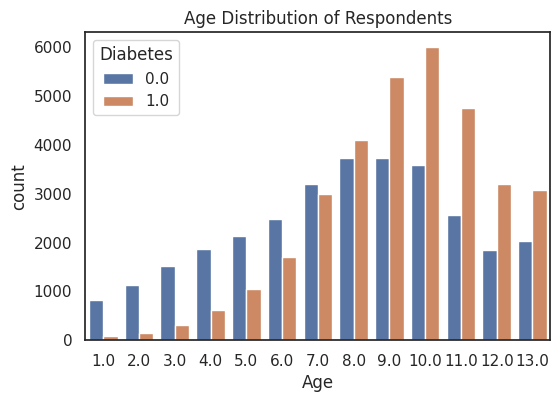

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['Age'], hue = 'Diabetes')
plt.title("Age Distribution of Respondents")

plt.show()

As we can see that the age group of respondents is fairly distrbuted. The minimum age is 1 which is categorical and stands for respondents from 18-24 where 9 = 60-64 and 13 = 80. Each bar from 1-8 on the graph represent an increment of 6 so for example bar 4 represents respondent from age 36 to 42. We can also create a contingency table which gives an overview of respondents having and not having diabetes in each age group

In [ ]:
age = pd.crosstab(df_dia['Age'],
                            df_dia['Diabetes'], 
                               margins = False)
print(age)

Diabetes   0.0   1.0
Age                 
1.0        814    78
2.0       1123   140
3.0       1510   314
4.0       1867   622
5.0       2131  1039
6.0       2485  1709
7.0       3203  2999
8.0       3738  4091
9.0       3736  5385
10.0      3585  6004
11.0      2556  4751
12.0      1846  3189
13.0      2028  3077


From the contingency table we can see that people from age group of 65-70 has the highest number of diabetic patients with relatively higher ratio too.

#### **Sex:**

Let's check out the gender of respondents

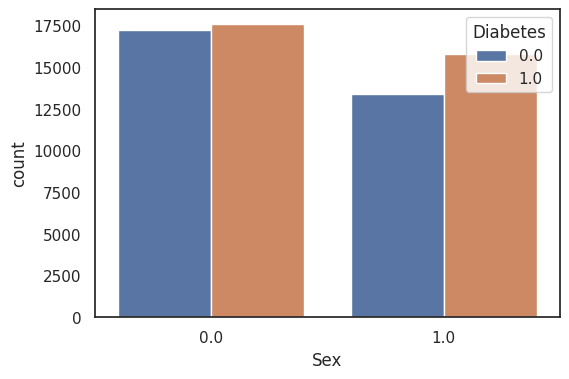

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['Sex'], hue = 'Diabetes')

plt.show()

From the graph we can see that the number of female respondents were higher than male respondants (around 5k) difference. The 0 represents females and 1 represents male. The contingency table shows:

In [ ]:
sex= pd.crosstab(df_dia['Sex'],
                            df_dia['Diabetes'], 
                               margins = False)
print(sex)

Diabetes    0.0    1.0
Sex                   
0.0       17219  17609
1.0       13403  15789


#### **High Cholesterol:**

Let's check out the cholesterol of respondents:

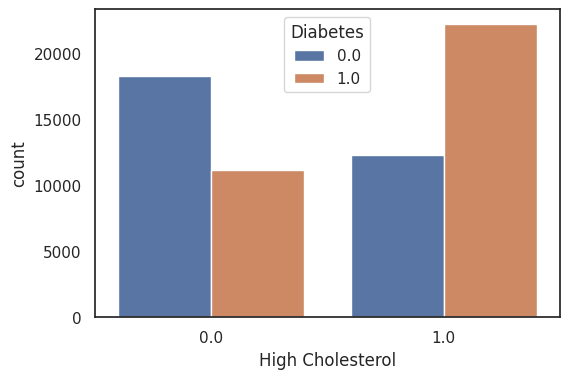

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['HighChol'], hue ="Diabetes")
plt.xlabel("High Cholesterol")
plt.show()

**0 = No high cholesterol,  1= High cholesterol**

As we can see that we have got a higher number of respondents with cholesterol level higher than normal range (170 mg/dl) Which makes sense since there are higher number of diabetic patients and even though I am not a doctor but I still feel like there might be some correlation between diabetes and cholesterol. To check out the number of high cholesterol respondents having diabetes we can use contingency table

In [ ]:
chol = pd.crosstab(df_dia['HighChol'],
                            df_dia['Diabetes'], 
                               margins = False)
print(chol)

Diabetes    0.0    1.0
HighChol              
0.0       18316  11162
1.0       12306  22236


The contingency table proves our point

#### **Heart disease:**

Let's check out heart disease or any heart attack history of the respondents




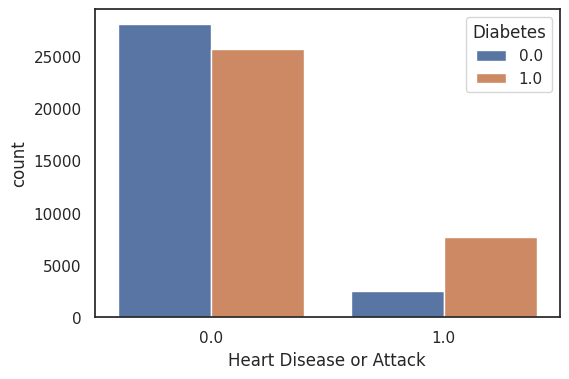

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['HeartDiseaseorAttack'], hue = "Diabetes")
plt.xlabel("Heart Disease or Attack")

plt.show()

**0 = No Heart attach/disease, 1 = Heart attach/disease**

A very few respondents (around 10K) had a history of heart disease or a heart attack.



In [ ]:
hrt = pd.crosstab(df_dia['HeartDiseaseorAttack'],
                            df_dia['Diabetes'], 
                               margins = False)
print(hrt)

Diabetes                0.0    1.0
HeartDiseaseorAttack              
0.0                   28094  25686
1.0                    2528   7712


#### **Smoker:**

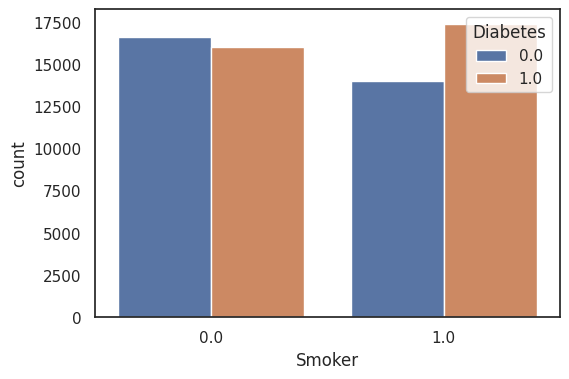

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['Smoker'], hue="Diabetes")

plt.show()

**0 = Non Smoker, 1 = Smoker**

There is a very minute difference between smoker and non smoker respondents.

In [ ]:
smoker = pd.crosstab(df_dia['Smoker'],
                            df_dia['Diabetes'], 
                               margins = False)
print(smoker)

Diabetes    0.0    1.0
Smoker                
0.0       16592  16013
1.0       14030  17385


Relatively higher number of smokers have diabetes

#### **Physical Activity:**

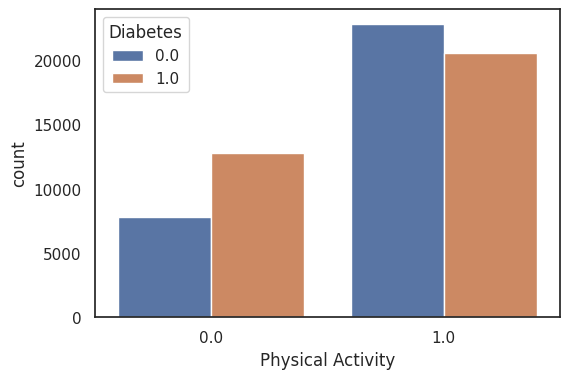

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['PhysActivity'], hue="Diabetes")
plt.xlabel("Physical Activity")
plt.show()

**0 = Non Active, 1 = Active**

More than Half of the respondents were physically active. To check out physical activity against diabetes we will go ahead and make a contingency table:


In [ ]:
act = pd.crosstab(df_dia['PhysActivity'],
                            df_dia['Diabetes'], 
                               margins = False)
print(act)

Diabetes        0.0    1.0
PhysActivity              
0.0            7777  12814
1.0           22845  20584


High number of physcially active people are non diabetic

#### **Heavy Alcohol consumption:**

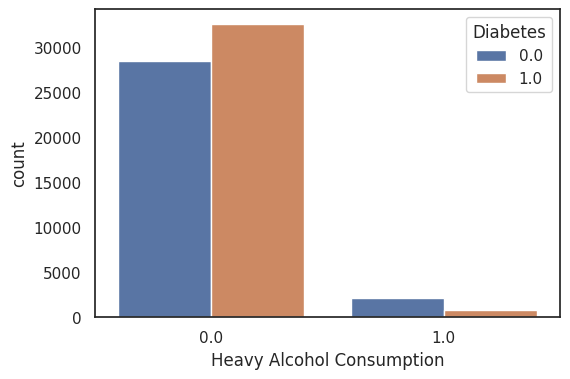

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['HvyAlcoholConsump'], hue="Diabetes")
plt.xlabel("Heavy Alcohol Consumption")

plt.show()

In [ ]:
alc = pd.crosstab(df_dia['HvyAlcoholConsump'],
                            df_dia['Diabetes'], 
                               margins = False)
print(alc)

Diabetes             0.0    1.0
HvyAlcoholConsump              
0.0                28484  32569
1.0                 2138    829


#### **General Health:**

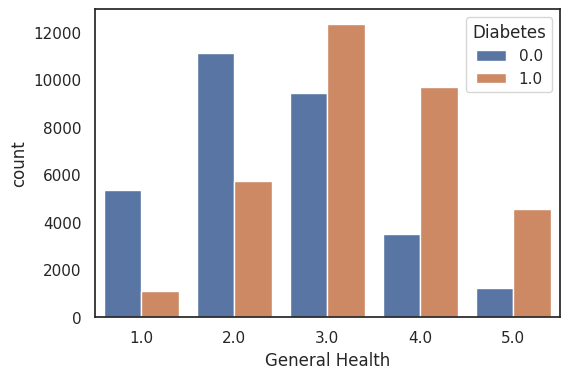

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['GenHlth'], hue="Diabetes")
plt.xlabel("General Health")

plt.show()

**1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor**

The general health among the respondents was failry distributed from excellent to poor

In [ ]:
gen_hlth = pd.crosstab(df_dia['GenHlth'],
                            df_dia['Diabetes'], 
                               margins = False)
print(gen_hlth)

Diabetes    0.0    1.0
GenHlth               
1.0        5356   1107
2.0       11109   5744
3.0        9423  12332
4.0        3504   9666
5.0        1230   4549


#### **Mental Health:**

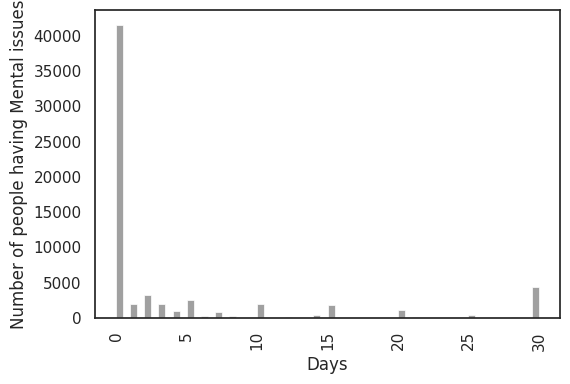

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.histplot(data = df_dia, x = df_dia['MentHlth'], color = "grey", binwidth = .5)
plt.xlabel("Days")
plt.ylabel("Number of people having Mental issues")
plt.xticks(rotation =90)

plt.show()

Mental Health represents for how many days in the past 30 days your mental health, which includes stress, depression, and problems with emotions were not good. So we can see that a huge number of people were not having any mental issues.

#### **Physical Health:**

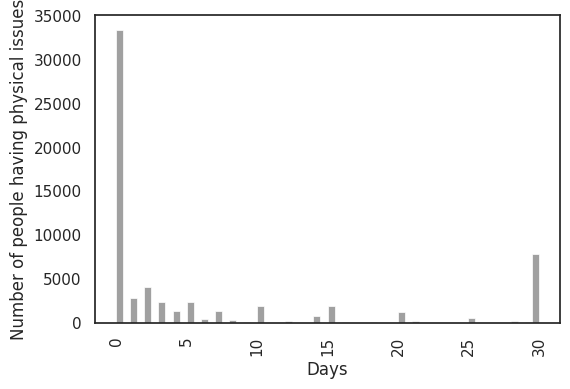

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.histplot(data = df_dia, x = df_dia['PhysHlth'], color= 'grey', binwidth = .5)
plt.xlabel("Days")
plt.ylabel("Number of people having physical issues")
plt.xticks(rotation =90)

plt.show()

Now about physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days and we can see that once again a lot of respondents had no physical issues in past 30 days

#### **Difficulty in Walking:**

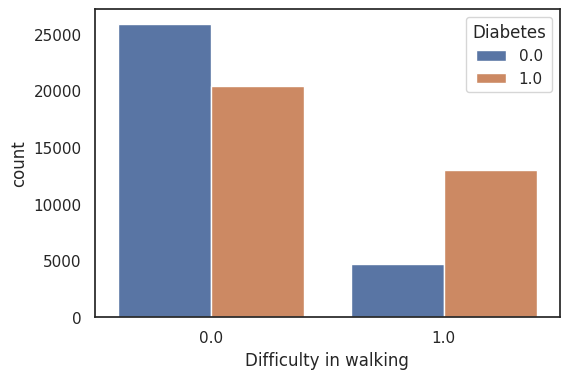

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['DiffWalk'], hue="Diabetes")
plt.xlabel("Difficulty in walking")

plt.show()

**0 = no, 1 = yes**

Similarly the contingency table:

In [ ]:
walk = pd.crosstab(df_dia['DiffWalk'],
                            df_dia['Diabetes'], 
                               margins = False)
print(walk)

Diabetes    0.0    1.0
DiffWalk              
0.0       25890  20396
1.0        4732  13002


#### **Stroke:**

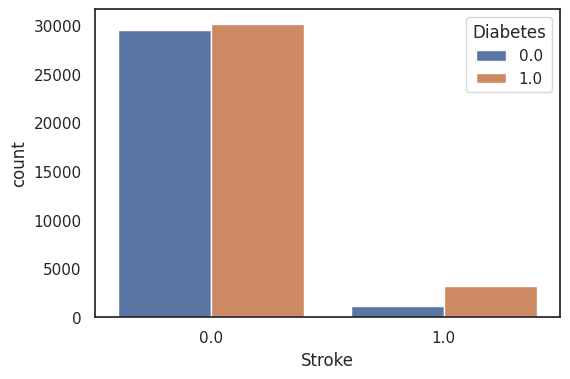

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['Stroke'], hue="Diabetes")
plt.xlabel("Stroke")

plt.show()

**0 = no , 1 = yes**

Contingency table:

In [ ]:
str = pd.crosstab(df_dia['Stroke'],
                            df_dia['Diabetes'], 
                               margins = False)
print(str)

Diabetes    0.0    1.0
Stroke                
0.0       29497  30137
1.0        1125   3261


#### **High Blood Pressure:**

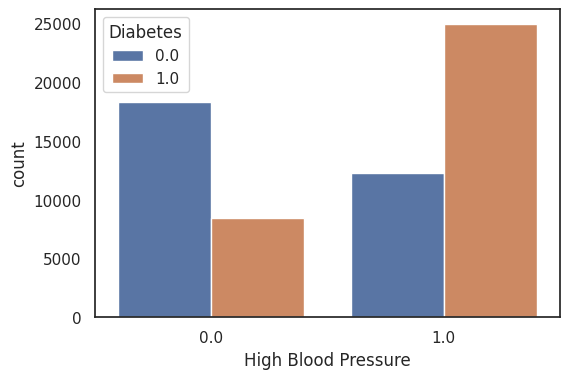

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_dia, x = df_dia['HighBP'], hue="Diabetes")
plt.xlabel("High Blood Pressure")

plt.show()

**0 = no high BP, 1 = high BP**

Contingency Table:

In [ ]:
bp = pd.crosstab(df_dia['HighBP'],
                            df_dia['Diabetes'], 
                               margins = False)
print(bp)

Diabetes    0.0    1.0
HighBP                
0.0       18352   8424
1.0       12270  24974


People with higher blood pressure were more diabetic as compared to low blood pressure.

#### **Body Mass Index:**

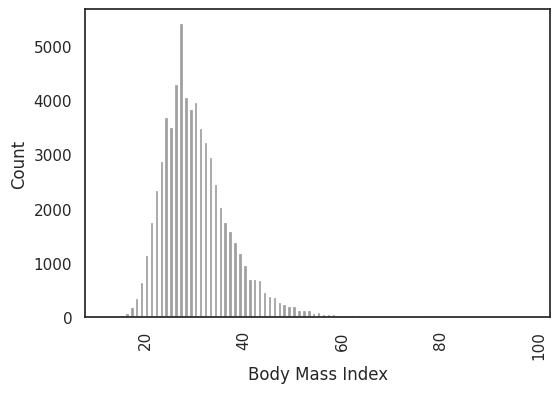

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.histplot(data = df_dia, x = df_dia['BMI'], color = 'grey', binwidth = .5)
plt.xlabel("Body Mass Index")
plt.xticks(rotation= 90)

plt.show()

### **Correlation:**

Now we know what kind of data we are dealing with and we have explored pretty much all the variable but now is the time to pick and choose which variable makes more sense so that we can add it on to our models. In order to achieve that we can make a correlation heat map and variable that has a high correlation will be added on the our model. Let's make a correlation table first

In [ ]:

df_dia.corr()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.003824,0.223167,0.106278,-0.053565,0.092337,0.226255,-0.098995,0.069133,-0.014837,-0.061587,0.144833,-0.111387,0.084432,0.200587,0.127761,0.322424,0.268049
Sex,-0.003824,1.000000,0.006887,-0.008544,-0.011160,0.107986,0.098797,0.055065,-0.085119,-0.053576,0.016574,-0.023970,-0.093526,-0.047989,-0.086296,0.004353,0.031179,0.035165
HighChol,0.223167,0.006887,1.000000,0.092838,0.111725,0.075290,0.174835,-0.075553,-0.034327,-0.030917,-0.030983,0.213129,0.075497,0.134077,0.154102,0.097449,0.290340,0.264501
CholCheck,0.106278,-0.008544,0.092838,1.000000,0.052450,-0.001440,0.048907,-0.015243,0.012657,-0.004777,-0.025547,0.071569,-0.004915,0.042959,0.052976,0.026230,0.112712,0.126594
BMI,-0.053565,-0.011160,0.111725,0.052450,1.000000,-0.008606,0.044472,-0.150165,-0.064183,-0.037684,-0.067368,0.236603,0.087284,0.141963,0.229152,0.011631,0.219511,0.272951
Smoker,0.092337,0.107986,0.075290,-0.001440,-0.008606,1.000000,0.115345,-0.064476,-0.059478,-0.016851,0.075661,0.129935,0.082002,0.109351,0.107859,0.059712,0.066900,0.062325
HeartDiseaseorAttack,0.226255,0.098797,0.174835,0.048907,0.044472,0.115345,1.000000,-0.082421,-0.004631,-0.022844,-0.043898,0.262446,0.060934,0.184197,0.219905,0.218692,0.203429,0.202174
PhysActivity,-0.098995,0.055065,-0.075553,-0.015243,-0.150165,-0.064476,-0.082421,1.000000,0.113476,0.129660,0.029473,-0.245422,-0.109005,-0.211920,-0.255267,-0.068082,-0.118643,-0.138712
Fruits,0.069133,-0.085119,-0.034327,0.012657,-0.064183,-0.059478,-0.004631,0.113476,1.000000,0.224769,-0.026307,-0.065993,-0.045006,-0.025619,-0.028066,0.001821,-0.021387,-0.031330
Veggies,-0.014837,-0.053576,-0.030917,-0.004777,-0.037684,-0.016851,-0.022844,0.129660,0.224769,1.000000,0.030034,-0.087571,-0.034359,-0.044706,-0.062799,-0.037732,-0.051518,-0.061857


As we can see that, in this cas features like `mental health(MentHlth)`, `Sex`, `Smoker`, `Fruits`, `Veggies` and `heavy alcohol consumption (HvyAlcoholConsump)` has weak correlation as compared to other features so we will drop those from our model features. We can also create a heatmap



<Axes: >

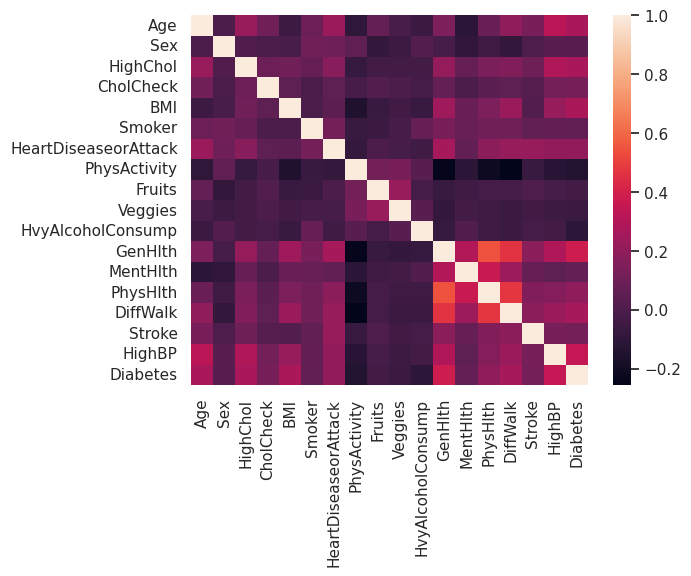

In [ ]:
sns.heatmap(df_dia.corr())

### **Machine Learning Models for Diabetes:**

In this particular section we will try out different machine learning models and compare their performance and we will suggest a model that will give relatively accurate predictions. The ML models that we will be using in our study are Logistic regression, K-Nearest Neighbors, Random Forest, Descision Tree, and Suport Vector Machine so before any further due let's split the data into training and testing set.

#### **Splitting the data**:

While splitting the data we will ignore the features with weak correlation. We will use 30% of the overall data set for testing our model

In [ ]:
#split data
X = df_dia.drop(['Diabetes','MentHlth','Sex', 'Smoker', 'Fruits', 'Veggies','HvyAlcoholConsump'], axis = 1)
y = df_dia['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44814, 11)
(44814,)
(19206, 11)
(19206,)


So now that our data is split the way we wanted let's go ahead and apply all the above mentioned machine learning models.

In [ ]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')
    
    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7353
- F1 score: 0.734749
- Precision: 0.735429
- Recall: 0.735284
----------------------------------
Model performance for Test set
- Accuracy: 0.7337
- Fl score: 0.7332
- Precision: 0.7336
- Recall: 0.7337


Decision Tree
Model performance for Training set
- Accuracy: 0.8987
- F1 score: 0.898668
- Precision: 0.901819
- Recall: 0.898670
----------------------------------
Model performance for Test set
- Accuracy: 0.6501
- Fl score: 0.6501
- Precision: 0.6529
- Recall: 0.6501


Random Forest
Model performance for Training set
- Accuracy: 0.8987
- F1 score: 0.898677
- Precision: 0.898688
- Recall: 0.898670
----------------------------------
Model performance for Test set
- Accuracy: 0.6913
- Fl score: 0.6908
- Precision: 0.6910
- Recall: 0.6913


Support Vector Machine
Model performance for Training set
- Accuracy: 0.7358
- F1 score: 0.733984
- Precision: 0.738278
- Recall: 0.735775
----------------------------------


We can see that when it comes to predicting the training data set Descision tree and random forest performs are equally good followed by KNN. Similarly, logistic regression and support vector machine models did not perform very well on training set but they did well relatively on testing set.


## **2. Hypertension:**

Lets investigate the hypertension data set we already have the data set loaded into our notebook. Let's display the first 10 rows to check if everything loaded correctly.

In [ ]:
df_hyp.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


Everything looks great so let's check out the shape of our data set.

In [ ]:
df_hyp.shape

(26083, 14)

### **Handling missing and duplicate values:**

In [ ]:
cols_with_missing = [col for col in df_hyp.columns
                     if df_hyp[col].isnull().any()]

In [ ]:
for i in cols_with_missing:
    print(i,df_hyp[i].isnull().sum())

sex 25


We can clearly see that our sex column has some missing values and we have no duplicates in our hypertension data frame

In [ ]:
for i in cols_with_missing:
    df_hyp = df_hyp[~df_hyp[i].isnull()]

The missing values are removed from the data frame since they were only 25 in number against 26K observations so even if we remove it from the analysis it's not going to effect the final outcome of our analysis. Let's check the data set for any duplicate values.


In [ ]:
df_hyp.duplicated().sum()

0

We do not have any duplicates in our data set so we can go ahead and explore the data.

### **Exploratory Data Analysis:**

We  will follow the same procedure for now and that is that we will check out all the variable one by one. We will start with our target variable.

#### **Hypertension:**

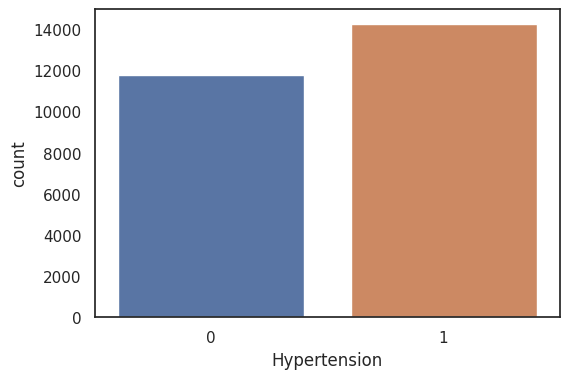

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_hyp, x = df_hyp['target'])
plt.xlabel("Hypertension")

plt.show()

**The patient has hypertension (1) or not (0)**

As we can see that our data set have more hypertensive respondent as compared to non hypertensive.

#### **Age:**

Let's check out the age distribution of respondents

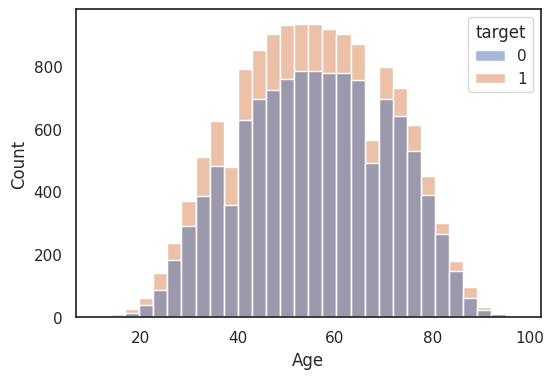

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.histplot(data = df_hyp, x = df_hyp['age'], hue = 'target', bins = 30)
plt.xlabel("Age")

plt.show()

We can see that the age of respondents is fairly distributed. We have repondents as young as 11-12 with hypertension and as old as 90+ with and without hypertension.

#### **Sex:**

Let's check out the gender distribtuion of respondents

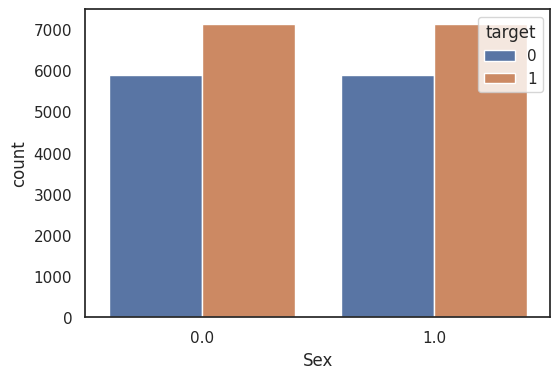

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_hyp, x = df_hyp['sex'], hue = 'target')
plt.xlabel("Sex")

plt.show()

Somehow we have equal number of male and female patients that are hypertensive and non-hypertensive. Sex column might not be a very good predictor to look at since there is no variation. the equality can be confirmed by contingency table as below

In [ ]:
sh = pd.crosstab(df_hyp['sex'],
                            df_hyp['target'], 
                               margins = False)
print(sh)

target     0     1
sex               
0.0     5892  7137
1.0     5892  7137


#### **Resting systolic blood pressure:**

We can check out the overall distribution using histogram.

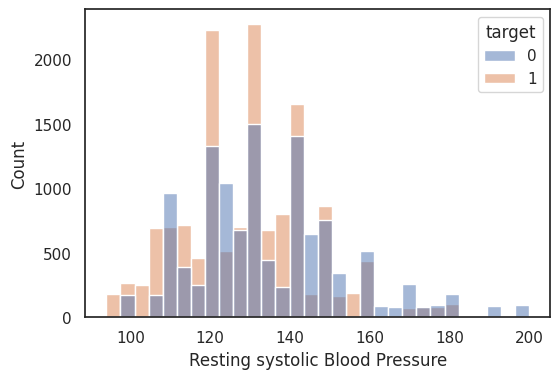

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.histplot(data = df_hyp, x = df_hyp['trestbps'], hue = 'target', bins = 30)
plt.xlabel("Resting systolic Blood Pressure")

plt.show()

Let's plot a ridges density graph to get a good idea of how the resting blood pressure is distributed for hypertensive and non hypertensive patients

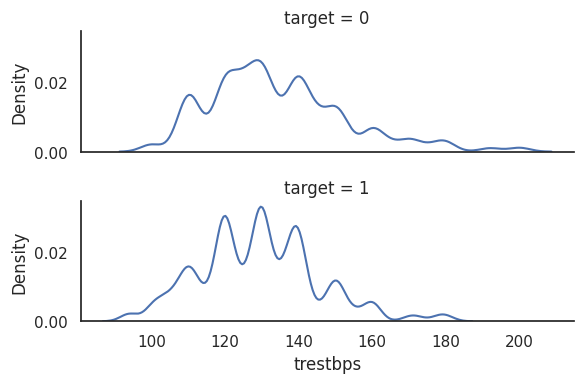

In [ ]:
sns.set_theme(style="white")
g = sns.FacetGrid(df_hyp, row="target", aspect=3, height=2)
g.map_dataframe(sns.kdeplot, x="trestbps")

We can see that there are people with low resting blood pressure and are still hypertensive while people with high blood pressure as non hypertensive which means that there are other factors too that contribute towards hypertensiveness.

#### **Cholesterol:**

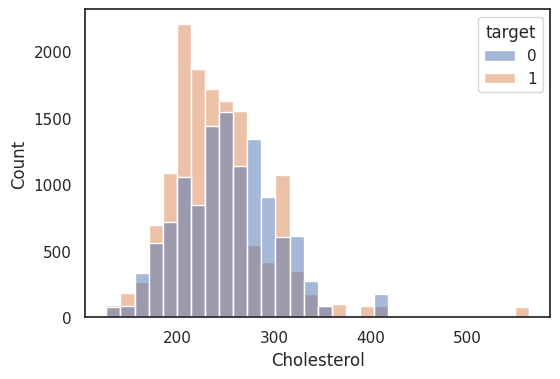

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.histplot(data = df_hyp, x = df_hyp['chol'], hue = 'target', bins = 30)
plt.xlabel("Cholesterol")

plt.show()

Let check out the ridges plot to see the cholesterol distribution for hypertensive and non-hypertensive patients

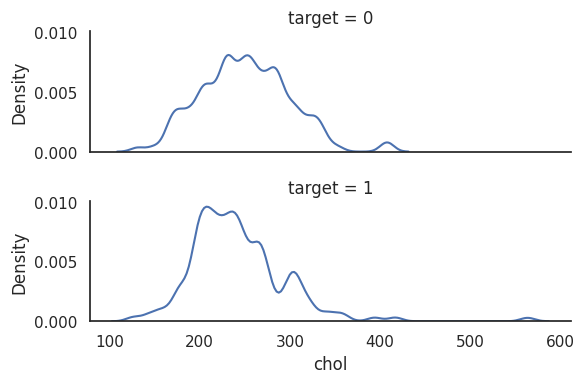

In [ ]:
sns.set_theme(style="white")
g = sns.FacetGrid(df_hyp, row="target", aspect=3, height=2)
g.map_dataframe(sns.kdeplot, x="chol")

#### **Maximum heart rate:**

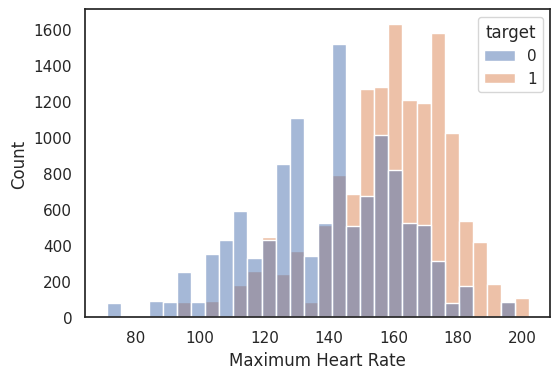

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.histplot(data = df_hyp, x = df_hyp['thalach'], hue = 'target', bins = 30)
plt.xlabel("Maximum Heart Rate")

plt.show()

We can see that people with slight higher heart rate has hypertension. We can confirm that with ridges plot

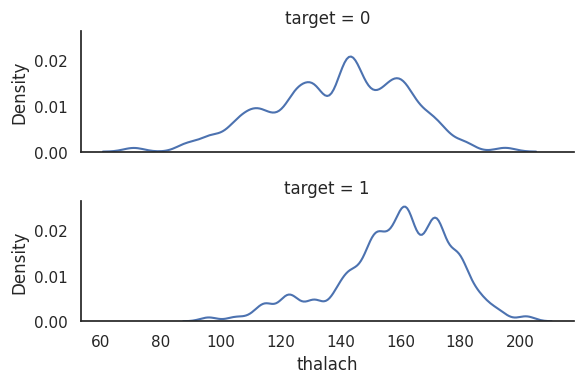

In [ ]:
sns.set_theme(style="white")
g = sns.FacetGrid(df_hyp, row="target", aspect=3, height=2)
g.map_dataframe(sns.kdeplot, x="thalach")

We can see that people with higher heart rate has a higher chance to be hypertensive.

#### **Chest Pain:**

Since it a categorical data so lets make a contingency table for it.

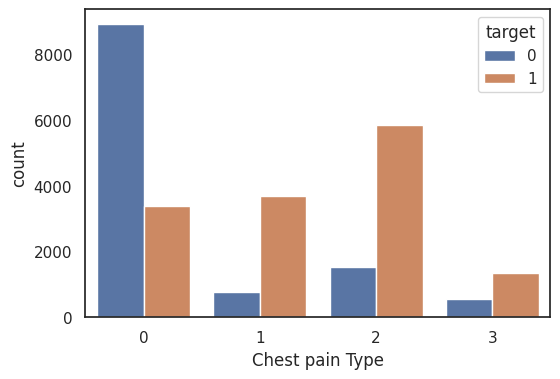

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_hyp, x = df_hyp['cp'], hue = 'target')
plt.xlabel("Chest pain Type")

plt.show()

In [ ]:
cp = pd.crosstab(df_hyp['cp'],
                            df_hyp['target'], 
                               margins = False)
print(cp)

target     0     1
cp                
0       8930  3384
1        776  3680
2       1532  5860
3        546  1350


#### **Exercise Induced Angina:**

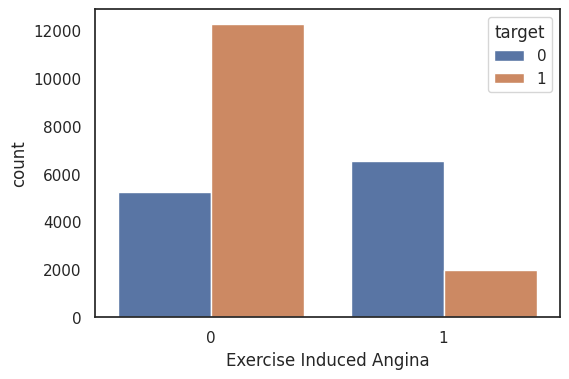

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_hyp, x = df_hyp['exang'], hue = 'target')
plt.xlabel("Exercise Induced Angina")

plt.show()

In [ ]:
ex = pd.crosstab(df_hyp['exang'],
                            df_hyp['target'], 
                               margins = False)
print(ex)

target     0      1
exang              
0       5260  12280
1       6524   1994


#### **Fasting Blood Sugar:**

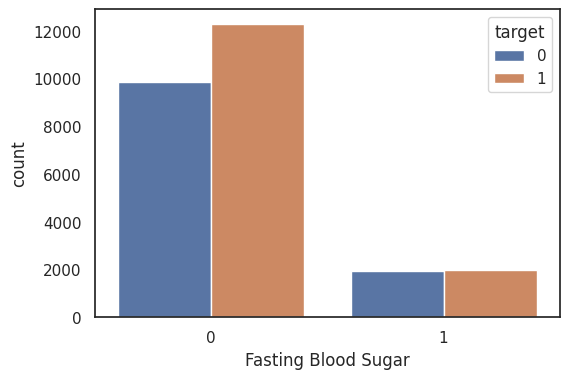

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_hyp, x = df_hyp['fbs'], hue = 'target')
plt.xlabel("Fasting Blood Sugar")

plt.show()

In [ ]:
fbs = pd.crosstab(df_hyp['fbs'],
                            df_hyp['target'], 
                               margins = False)
print(fbs)

target     0      1
fbs                
0       9860  12292
1       1924   1982


We have very less variation so this also might not be a very good predictor of hypertension

#### **Resting ECG:**

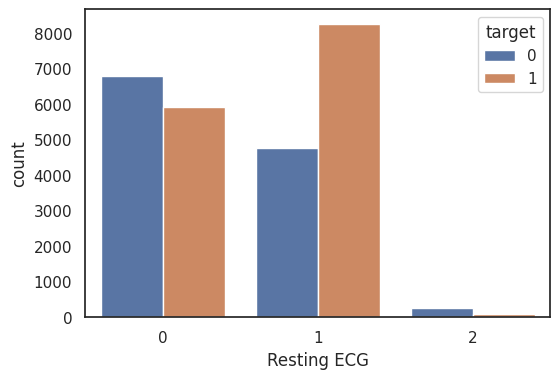

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_hyp, x = df_hyp['restecg'], hue = 'target')
plt.xlabel("Resting ECG")

plt.show()

Similarly, the contingency table:

In [ ]:
rest = pd.crosstab(df_hyp['restecg'],
                            df_hyp['target'], 
                               margins = False)
print(rest)

target      0     1
restecg            
0        6776  5926
1        4752  8252
2         256    96


#### **Old Peak:**

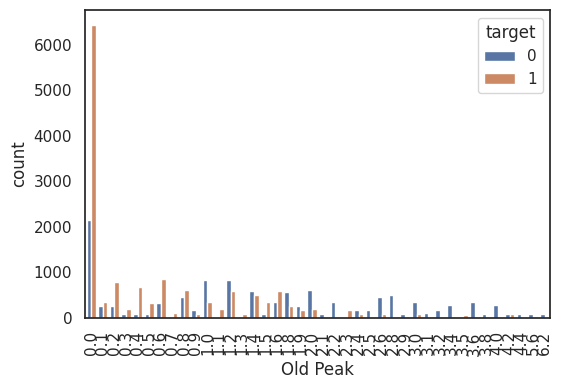

In [169]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_hyp, x = df_hyp['oldpeak'], hue = 'target')
plt.xlabel("Old Peak")
plt.xticks(rotation = 90)

plt.show()

In [ ]:
rest = pd.crosstab(df_hyp['oldpeak'],
                            df_hyp['target'], 
                               margins = False)
print(rest)

target      0     1
oldpeak            
0.0      2152  6440
0.1       264   342
0.2       252   790
0.3        86   184
0.4        84   678
0.5        86   332
0.6       330   860
0.7         0   104
0.8       464   622
0.9       170    80
1.0       842   338
1.1         0   192
1.2       834   600
1.3         0    90
1.4       594   500
1.5        80   346
1.6       342   584
1.8       572   258
1.9       258   170
2.0       608   184
2.1        80     0
2.2       344     0
2.3         0   166
2.4       176    82
2.5       170     0
2.6       466    94
2.8       500     0
2.9        80     0
3.0       352    82
3.1        98     0
3.2       164     0
3.4       280     0
3.5         0    74
3.6       348     0
3.8        96     0
4.0       276     0
4.2        78    82
4.4        80     0
5.6        88     0
6.2        90     0


#### **Chest vessels:**

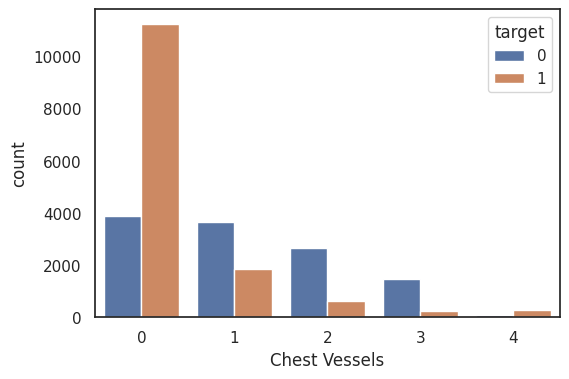

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_hyp, x = df_hyp['ca'], hue = 'target')
plt.xlabel("Chest Vessels")

plt.show()

#### **Slope:**

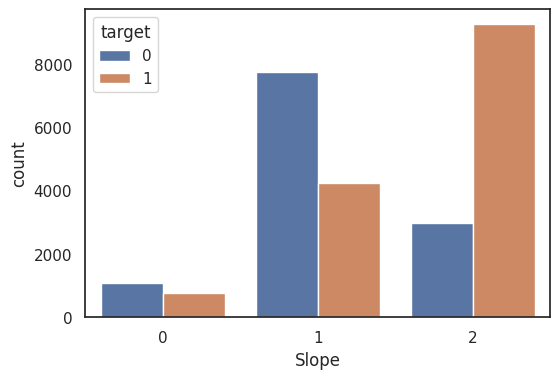

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = df_hyp, x = df_hyp['slope'], hue = 'target')
plt.xlabel("Slope")

plt.show()

Now let's make a correlation table to see which are the most important features that can help us in predicting our target variable

In [ ]:
df_hyp.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-9.874843e-02,6.423732e-04,2.183637e-02,1.800139e-02,-6.484766e-03,-7.222071e-03,-5.043529e-02,1.205085e-02,8.104003e-03,-9.294172e-03,4.902799e-02,7.991357e-03,-2.316109e-02
sex,-0.098748,1.000000e+00,-2.727016e-16,1.652588e-15,5.184534e-16,-1.494135e-16,3.157680e-17,-7.267165e-16,4.041910e-18,-5.427477e-16,-3.324648e-16,2.195387e-17,3.715688e-18,4.951044e-16
cp,0.000642,-2.727016e-16,1.000000e+00,3.849478e-02,-7.080320e-02,8.951821e-02,4.701292e-02,2.889694e-01,-3.924467e-01,-1.522552e-01,1.213752e-01,-2.011471e-01,-1.680074e-01,4.370111e-01
trestbps,0.021836,1.652588e-15,3.849478e-02,1.000000e+00,1.334601e-01,1.773226e-01,-1.136857e-01,-5.088878e-02,7.578560e-02,2.038918e-01,-1.323847e-01,1.013769e-01,6.159422e-02,-1.484513e-01
chol,0.018001,5.184534e-16,-7.080320e-02,1.334601e-01,1.000000e+00,4.372090e-03,-1.514712e-01,-7.399770e-03,6.461357e-02,4.729838e-02,7.446393e-03,8.928849e-02,8.541772e-02,-8.305517e-02
fbs,-0.006485,-1.494135e-16,8.951821e-02,1.773226e-01,4.372090e-03,1.000000e+00,-8.809729e-02,-8.116243e-03,2.777315e-02,6.545115e-03,-5.847128e-02,1.495954e-01,-2.528089e-02,-3.404579e-02
restecg,-0.007222,3.157680e-17,4.701292e-02,-1.136857e-01,-1.514712e-01,-8.809729e-02,1.000000e+00,3.421717e-02,-6.862642e-02,-5.702836e-02,8.532581e-02,-8.765704e-02,-9.612092e-03,1.371512e-01
thalach,-0.050435,-7.267165e-16,2.889694e-01,-5.088878e-02,-7.399770e-03,-8.116243e-03,3.421717e-02,1.000000e+00,-3.702364e-01,-3.447578e-01,3.923435e-01,-2.258395e-01,-1.108005e-01,4.199125e-01
exang,0.012051,4.041910e-18,-3.924467e-01,7.578560e-02,6.461357e-02,2.777315e-02,-6.862642e-02,-3.702364e-01,1.000000e+00,2.897175e-01,-2.583466e-01,1.271498e-01,2.218600e-01,-4.392081e-01
oldpeak,0.008104,-5.427477e-16,-1.522552e-01,2.038918e-01,4.729838e-02,6.545115e-03,-5.702836e-02,-3.447578e-01,2.897175e-01,1.000000e+00,-5.819241e-01,2.320657e-01,2.258509e-01,-4.386150e-01


<Axes: >

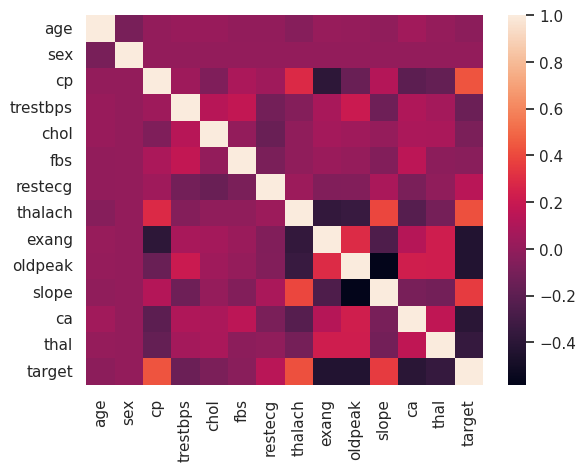

In [ ]:
sns.heatmap(df_hyp.corr())

### **Machine Learning Models:**

According to the correlation table and heatmap we can see that hypertension has a very strong correlation with chest pain, maximum heart rate achieved, exercise induced angina, resting systolic blood pressure, rest ECG, cholesterol, slope, old peak and thalasemia problem. So we will feed only these independent variables into our model

#### **Splitting the data:**

In [ ]:
X = df_hyp.drop(['target','age','sex', 'fbs'], axis = 1)
y = df_hyp['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18240, 10)
(18240,)
(7818, 10)
(7818,)


Now our data is split into training and testing set so we can go ahead apply the models

In [ ]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8565
- F1 score: 0.855310
- Precision: 0.859581
- Recall: 0.856524
----------------------------------
Model performance for Test set
- Accuracy: 0.8543
- Fl score: 0.8531
- Precision: 0.8567
- Recall: 0.8543


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- Fl score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- Fl score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


Support Vector Machine
Model performance for Training set
- Accuracy: 0.7450
- F1 score: 0.742208
- Precision: 0.746291
- Recall: 0.745011
----------------------------------


### **Conclusion:**

## **3. Stroke:**

In [ ]:
df_str.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


### **Exploratory Data Analysis:**
Everything looks good so let's check out the different variable we have available in our data set. Previously we saw that getting through each and every variable is very time consumming so for this particular data set we will use `pandas_profiling`. The  whole profile of the data set  can be summarize and visualize using `pandas_profile`. It helps us in taking a quick overview of the whole data set and it also informs us about missing values, duplicate values and also the correlation among variables. Let's run `pandas_profiling` and take an overview of all the variables.

In [ ]:
pandas_profiling.ProfileReport(df_str)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Handling Missing rows:**

In [ ]:
cols_with_missing_str = [col for col in df_str.columns
                     if df_str[col].isnull().any()]

In [ ]:
for i in cols_with_missing_str:
    print(i,df_str[i].isnull().sum())

sex 3


In [ ]:
for i in cols_with_missing_str:
    df_str = df_str[~df_str[i].isnull()]

### **Machine Learning Models:**

We can see that aprt from `smoking_status` and `residence_type` every other variable has a realively strong correlation with our target variable under the name of `stroke`. So let's feed the variable with high correlation into our models and check out the results

#### **Splitting the Data:**

In [ ]:
X = df_str.drop(['stroke','Residence_type','smoking_status'], axis = 1)
y = df_str['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32725, 8)
(32725,)
(8182, 8)
(8182,)


In [ ]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.6809
- F1 score: 0.679256
- Precision: 0.684810
- Recall: 0.680886
----------------------------------
Model performance for Test set
- Accuracy: 0.6784
- Fl score: 0.6768
- Precision: 0.6816
- Recall: 0.6784


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.9996
- Fl score: 0.9996
- Precision: 0.9996
- Recall: 0.9996


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.9924
- Fl score: 0.9924
- Precision: 0.9925
- Recall: 0.9924


Support Vector Machine
Model performance for Training set
- Accuracy: 0.6454
- F1 score: 0.638215
- Precision: 0.658220
- Recall: 0.645378
----------------------------------


As we can see that in the above models Decision tree perform best out of all but closely followed by random forest. KNN model also came up with relatively good accuracy. Support vector machine performance for this kind of data set is way below par and similarly for logistic regression

## **Conclusion:**

In this particular study we use three different data set to predict diabetes, hypertension and Stroke using different ML models and also compare and contrast their accuracies. We saw that the factors that were contributing towards diabetes or had a strong correlation with diabetes were Age, High Cholesterol, BMI, Heart disease, Physical activity, General health, walking and Blood pressure. The best models to test the new data came out to be Logistic regression and support vector machine while the worst model in this case of new data was decision tree but keeping in mind that since we are not tweaking any of the machine learning models so it may respond differently under different circumstances. For instance, if I change the hyperparameter of KNN then we might experience some change in the accuracy of model. Similarly the main features that were helpful in predicting hypertension were chest pain, resting blood pressure, cholesterol, heart rate, exercise induced angina, chest vessel and the best ML algorithm was Decision tree , random forest and KNN. Finally the features that helped in predicting stroke were sex, age, hypertension, heart disease, marital status, average glucose level and body mass index. The best ML algorithm was Decision tree , random forest and KNN.